In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def to_log(num):
    return math.log10(float(num['revenue']))

In [2]:
meta=pd.read_csv('cleanedrev1_meta.csv')
meta=meta.replace(0,np.nan)
meta_nona=meta.dropna(subset=['revenue','vote_average'])

In [3]:
meta_nona.loc[:,"to_log"] = meta_nona.apply(to_log,axis=1)
print(meta_nona['to_log'].describe())

count    6122.000000
mean        6.741576
std         1.281396
min         0.000000
25%         6.249780
50%         7.082553
75%         7.607357
max         8.213366
Name: to_log, dtype: float64


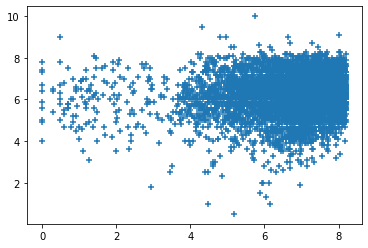

In [4]:
plt.scatter(meta_nona['to_log'],meta_nona['vote_average'],marker='+')
plt.show()
clf=KMeans(n_clusters=4)
relation= np.array(meta_nona[['to_log','vote_average']])
clf=clf.fit(relation)
data=meta_nona

In [5]:
clf.cluster_centers_

array([[7.26405006, 5.38081253],
       [7.30819908, 6.89650376],
       [1.76823418, 5.884375  ],
       [5.32862964, 6.2019857 ]])

In [6]:
data['labels']=clf.labels_

In [7]:
#data.to_csv('kmeans.csv')
data0=data.loc[data["labels"] == 0]
data1=data.loc[data["labels"] == 1]
data2=data.loc[data["labels"] == 2]
data3=data.loc[data["labels"] == 3]

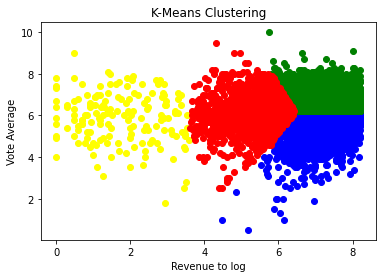

In [8]:
plt.scatter(data0['to_log'],data0['vote_average'],color='blue')
plt.scatter(data1['to_log'],data1['vote_average'],color='green')
plt.scatter(data2['to_log'],data2['vote_average'],color='yellow')
plt.scatter(data3['to_log'],data3['vote_average'],color='red')
plt.xlabel('Revenue to log')
plt.ylabel('Vote Average')
plt.title('K-Means Clustering')
plt.show()

In [12]:
from scipy.spatial.distance import cdist

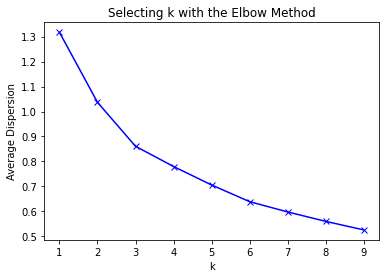

In [14]:
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(relation)
    meandistortions.append(sum(np.min(cdist(relation, kmeans.cluster_centers_, 'euclidean'), axis=1))/relation.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

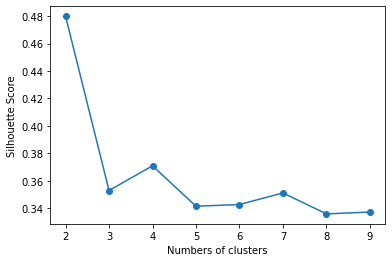

In [28]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)  # 构造聚类器
    kmeans.fit(relation)
    Scores.append(silhouette_score(relation,kmeans.labels_,metric='euclidean'))
X = range(2,10)
plt.xlabel('Numbers of clusters')
plt.ylabel('Silhouette Score')
plt.plot(X,Scores,'o-')
plt.show()